# 4. Modelo de Regresión Polinómica

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

In [15]:
df = pd.read_csv("Heart_std.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0.515952,1.198363,0.410909,0.825070,-0.551341,-0.749180,1.382928,-0.823556,-0.832432,0.699073,-1.113115
1,-0.478484,-1.938163,-1.371957,1.491752,-0.171961,-0.551341,-0.749180,0.754157,-0.823556,0.105664,-0.917423,0.898380
2,-1.751359,0.515952,1.198363,-0.129513,0.770188,-0.551341,0.492241,-1.525138,-0.823556,-0.832432,0.699073,-1.113115
3,-0.584556,-1.938163,-0.086797,0.302825,0.139040,-0.551341,-0.749180,-1.132156,1.214246,0.574711,-0.917423,0.898380
4,0.051881,0.515952,-1.371957,0.951331,-0.034755,-0.551341,-0.749180,-0.581981,-0.823556,-0.832432,0.699073,-1.113115
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,2.483522,-1.210356,0.596393,-0.551341,-0.749180,-0.188999,-0.823556,0.293283,-0.917423,0.898380
914,1.536902,0.515952,-0.086797,0.627078,-0.053049,1.813758,-0.749180,0.164684,-0.823556,2.357094,-0.917423,0.898380
915,0.370100,0.515952,-0.086797,-0.129513,-0.620168,-0.551341,-0.749180,-0.857069,1.214246,0.293283,-0.917423,0.898380
916,0.370100,-1.938163,1.198363,-0.129513,0.340275,-0.551341,1.733661,1.461525,-0.823556,-0.832432,-0.917423,0.898380


# Separamos la variable target

In [16]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [17]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

y = df["HeartDisease"]


# Creamos nuestro modelo

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

## Visualizamos de nuestro modelo

C:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease'>

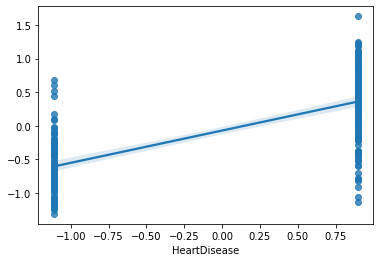

In [20]:
y_pred = lin_reg.predict(X_test)
sns.regplot(y_test, y_pred)

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_poly_train = poly_reg.transform(X_train) 

pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

LinearRegression()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [23]:
print('MAE train', mean_absolute_error(y_train, pol_reg.predict(X_poly_train)))
print('MAPE train', mean_absolute_percentage_error(y_train, pol_reg.predict(X_poly_train)))
print('MSE train', mean_squared_error(y_train, pol_reg.predict(X_poly_train)))
print('RMSE train', np.sqrt(mean_squared_error(y_train, pol_reg.predict(X_poly_train))))
print('R2 score train', 100*r2_score(y_train, pol_reg.predict(X_poly_train)),"%")

MAE train 0.4480744016387889
MAPE train 0.4514036114254938
MSE train 0.37865221350167677
RMSE train 0.6153472300268172
R2 score train 62.42042293349811 %


### Vemos que otra vez,crear un modelo de regresión, ya sea lineal o polinómica, no es la mejor manera de abarcar este problema. Hemos obtenido un 62% de acierto.